100it [00:40,  2.45it/s]


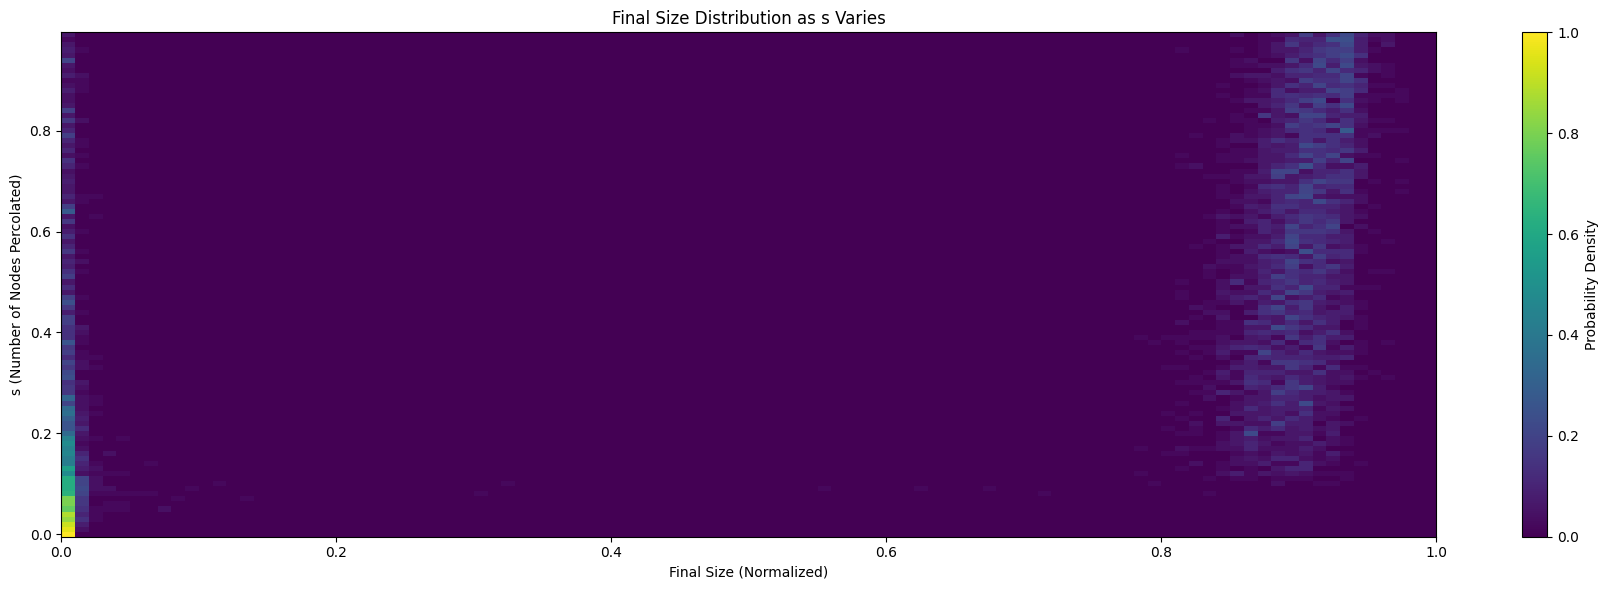

In [34]:
import networkx as nx
import random
from collections import deque
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Perform dynamic percolation that stops when s nodes are percolated
def percolate_graph(G, p_m, s):
    """
    Performs dynamic percolation on graph G with transmission probability p_m,
    starting from a random node, and stops when s nodes have been percolated.
    """
    if s <= 0 or G.number_of_nodes() == 0:
        return nx.Graph()
    
    percolated_nodes = set()
    initial_node = random.choice(list(G.nodes()))
    percolated_nodes.add(initial_node)
    queue = deque([initial_node])
    
    while queue and len(percolated_nodes) < s:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor not in percolated_nodes and random.random() < p_m:
                percolated_nodes.add(neighbor)
                queue.append(neighbor)
                if len(percolated_nodes) >= s:
                    break  # Stop if we've reached s nodes
    G_perc = G.subgraph(percolated_nodes).copy()
    return G_perc

# Simulate the epidemic on the susceptible subgraph
def simulate_epidemic(G, p_i):
    """
    Simulates an epidemic on graph G with infection probability p_i.
    """
    if G.number_of_nodes() == 0:
        return set()
    
    susceptible = set(G.nodes())
    infected = set()
    initial_node = random.choice(list(G.nodes()))
    infected.add(initial_node)
    susceptible.remove(initial_node)
    queue = deque([initial_node])

    while queue:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor in susceptible and random.random() < p_i:
                susceptible.remove(neighbor)
                infected.add(neighbor)
                queue.append(neighbor)
    return infected

def fs_epi(n, m, p, p_m, p_i, s, N):
    """
    Runs N simulations of the epidemic for a given s and collects the final sizes.
    """
    final_size = []
    for _ in range(N):
        # Generate a clustered network using the powerlaw_cluster_graph function
        G = nx.powerlaw_cluster_graph(n, m, p)
        # Run percolation
        G_perc = percolate_graph(G, p_m, s)
        G_susceptible = G_perc
        if G_susceptible.number_of_nodes() > 0:
            infected_nodes = simulate_epidemic(G_susceptible, p_i)
            final_size.append(len(infected_nodes) / s) #we should divide by the number of suceptibles in the system
            #final_size.append(len(infected_nodes) / G_susceptible.number_of_nodes())
        else:
            final_size.append(0)
    return final_size

# Parameters
n = 1000      # Number of nodes in the network
m = 4         # Each new node attaches to m existing nodes
p = 0.5       # Probability of creating a triangle after adding a random edge
p_m = 0.5     # Probability for meta-infection (percolation)
beta = 1.1    # Trasmission rate
nu = 0.8      # Recovery rate  
p_i = beta/(beta+nu)    # Probability for epidemic infection
N = 50     # Number of simulations per s value
s = 200

p_m_list = np.arange(0, 1,0.01)  # s values

# Bins for the final size histogram
fs_bins = np.linspace(0, 1, 101)  # 20 bins from 0 to 1
fs_bin_centers = (fs_bins[:-1] + fs_bins[1:]) / 2

counts = np.zeros((len(p_m_list), len(fs_bins) - 1))

# Collect final size distributions for each s
for s_idx, p_m in tqdm(enumerate(p_m_list)):
    final_size = fs_epi(n, m, p, p_m, p_i, s, N)
    hist, _ = np.histogram(final_size, bins=fs_bins)
    counts[s_idx, :] = hist

# Normalize counts to get probabilities
counts_normalized = counts / counts.sum(axis=1, keepdims=True)
counts_normalized[np.isnan(counts_normalized)] = 0  # Handle division by zero

# Plotting the heatmap using matplotlib
plt.figure(figsize=(18, 6))
X, Y = np.meshgrid(fs_bin_centers, p_m_list)
plt.pcolormesh(X, Y, counts_normalized, shading='auto', cmap='viridis')

plt.colorbar(label='Probability Density')
plt.xlabel('Final Size (Normalized)')
plt.ylabel('s (Number of Nodes Percolated)')
plt.title('Final Size Distribution as s Varies')
plt.tight_layout()
plt.show()


In [1]:
%matplotlib ipympl

Running simulations for s = 5, p_i = 0.10
Running simulations for s = 5, p_i = 0.12
Running simulations for s = 5, p_i = 0.13
Running simulations for s = 5, p_i = 0.15
Running simulations for s = 5, p_i = 0.17
Running simulations for s = 5, p_i = 0.18
Running simulations for s = 5, p_i = 0.20
Running simulations for s = 5, p_i = 0.21
Running simulations for s = 5, p_i = 0.23
Running simulations for s = 5, p_i = 0.25
Running simulations for s = 5, p_i = 0.26
Running simulations for s = 5, p_i = 0.28
Running simulations for s = 5, p_i = 0.30
Running simulations for s = 5, p_i = 0.31
Running simulations for s = 5, p_i = 0.33
Running simulations for s = 5, p_i = 0.34
Running simulations for s = 5, p_i = 0.36
Running simulations for s = 5, p_i = 0.38
Running simulations for s = 5, p_i = 0.39
Running simulations for s = 5, p_i = 0.41
Running simulations for s = 5, p_i = 0.43
Running simulations for s = 5, p_i = 0.44
Running simulations for s = 5, p_i = 0.46
Running simulations for s = 5, p_i

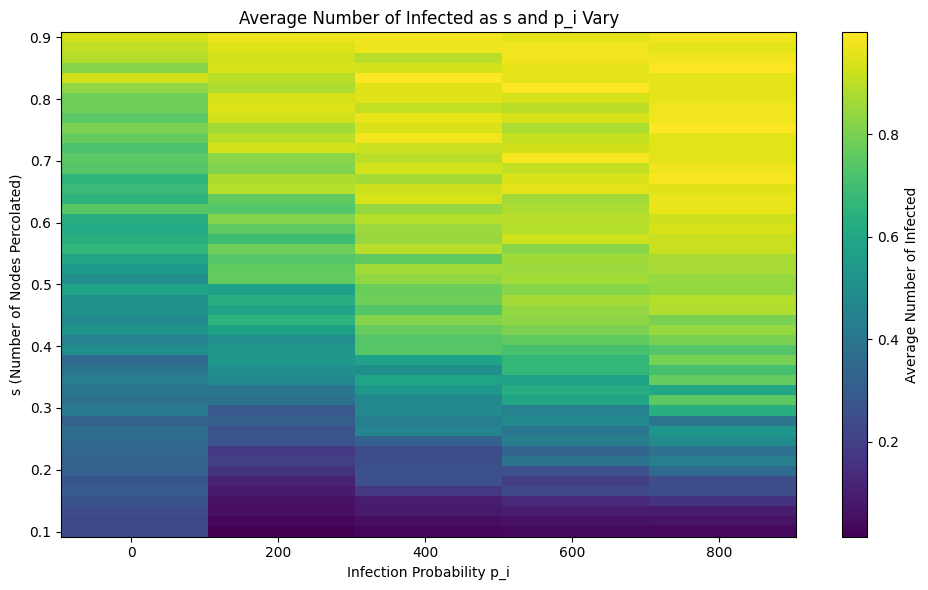

In [6]:
import networkx as nx
import random
from collections import deque
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Perform dynamic percolation that stops when s nodes are percolated
def percolate_graph(G, p_m, s):
    """
    Performs dynamic percolation on graph G with transmission probability p_m,
    starting from a random node, and stops when s nodes have been percolated.
    """
    if s <= 0 or G.number_of_nodes() == 0:
        return nx.Graph()
    
    percolated_nodes = set()
    initial_node = random.choice(list(G.nodes()))
    percolated_nodes.add(initial_node)
    queue = deque([initial_node])
    
    while queue and len(percolated_nodes) < s:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor not in percolated_nodes and random.random() < p_m:
                percolated_nodes.add(neighbor)
                queue.append(neighbor)
                if len(percolated_nodes) >= s:
                    break  # Stop if we've reached s nodes
    G_perc = G.subgraph(percolated_nodes).copy()
    return G_perc

# Simulate the epidemic on the susceptible subgraph
def simulate_epidemic(G, p_i):
    """
    Simulates an epidemic on graph G with infection probability p_i.
    """
    if G.number_of_nodes() == 0:
        return set()
    
    susceptible = set(G.nodes())
    infected = set()
    initial_node = random.choice(list(G.nodes()))
    infected.add(initial_node)
    susceptible.remove(initial_node)
    queue = deque([initial_node])

    while queue:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor in susceptible and random.random() < p_i:
                susceptible.remove(neighbor)
                infected.add(neighbor)
                queue.append(neighbor)
    return infected

def average_infected_epi(n, m, p, p_m, p_i, s, N):
    """
    Runs N simulations of the epidemic for given s and p_i,
    and returns the average number of infected individuals.
    """
    total_infected = 0
    for _ in range(N):
        # Generate a clustered network using the powerlaw_cluster_graph function
        G = nx.powerlaw_cluster_graph(n, m, p)
        # Run percolation
        G_perc = percolate_graph(G, p_m, s)
        G_susceptible = G_perc
        if G_susceptible.number_of_nodes() > 0:
            infected_nodes = simulate_epidemic(G_susceptible, p_i)
            total_infected += len(infected_nodes)/s
        else:
            total_infected += 0
    average_infected = total_infected / N
    return average_infected

# Parameters
n = 1000      # Number of nodes in the network
m = 4         # Each new node attaches to m existing nodes
p = 0.5       # Probability of creating a triangle after adding a random edge
p_m = 0.5     # Probability for meta-infection (percolation)
N = 50        # Number of simulations per parameter combination

# Lists of s and p_i values
s_list = range(5, n, 200)  # s values from 50 to 550 in steps of 50
p_i_list = np.linspace(0.1, 0.9, 50)  # p_i values from 0.1 to 0.9

# Initialize the matrix to store average infected counts
average_infected = np.zeros((len(p_i_list),len(s_list)))

# Run simulations and collect data
for i, s in enumerate(s_list):
    for j, p_i in enumerate(p_i_list):
        print(f"Running simulations for s = {s}, p_i = {p_i:.2f}")
        avg_inf = average_infected_epi(n, m, p, p_m, p_i, s, N)
        average_infected[j, i] = avg_inf

# Plotting the heatmap using matplotlib
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(s_list, p_i_list)
plt.pcolormesh(X, np.flipud(Y), np.flipud(average_infected), shading='auto', cmap='viridis')

plt.colorbar(label='Average Number of Infected')
plt.xlabel('Infection Probability p_i')
plt.ylabel('s (Number of Nodes Percolated)')
plt.title('Average Number of Infected as s and p_i Vary')
plt.tight_layout()
plt.show()


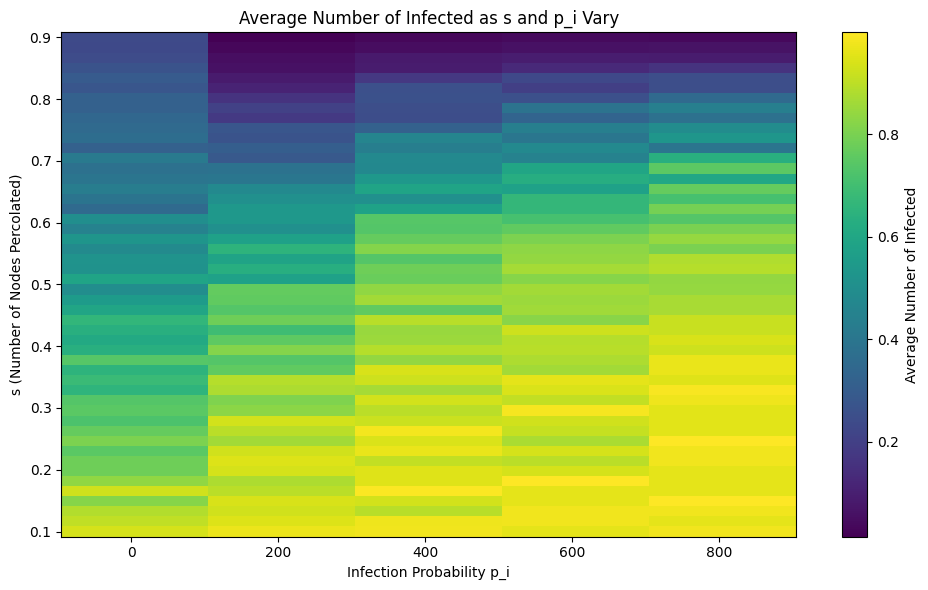

In [7]:
# Plotting the heatmap using matplotlib
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(s_list, p_i_list)
plt.pcolormesh(X, Y, np.flipud(average_infected), shading='auto', cmap='viridis')

plt.colorbar(label='Average Number of Infected')
plt.xlabel('Infection Probability p_i')
plt.ylabel('s (Number of Nodes Percolated)')
plt.title('Average Number of Infected as s and p_i Vary')
plt.tight_layout()
plt.show()

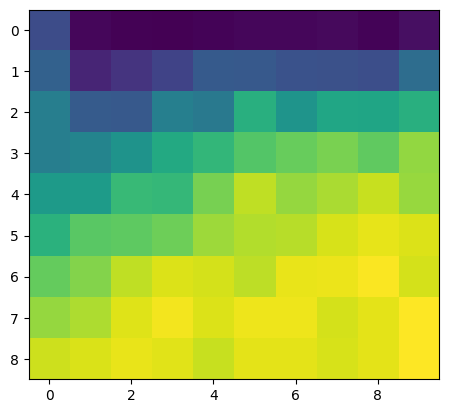

In [4]:
plt.imshow(average_infected)

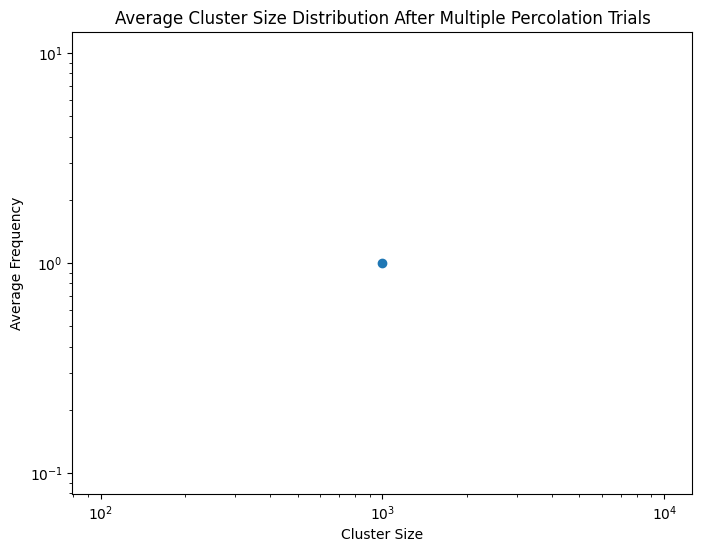

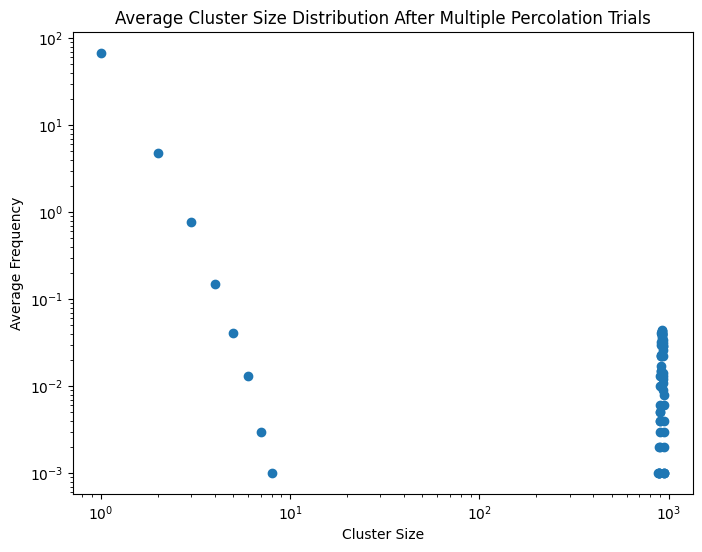

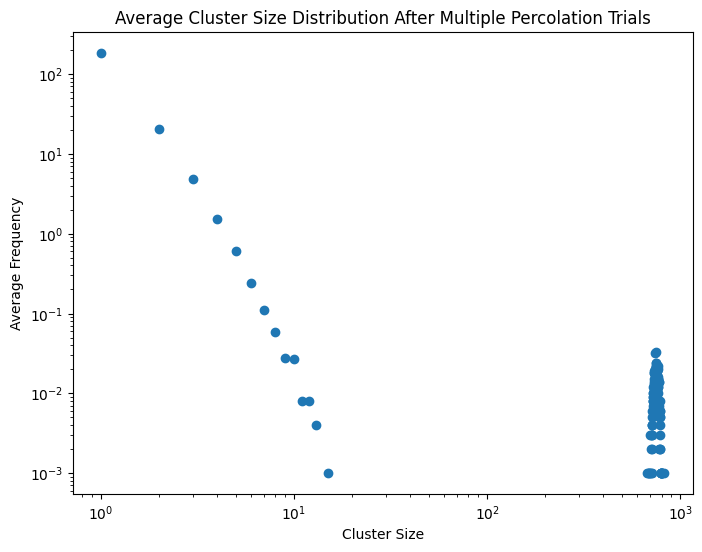

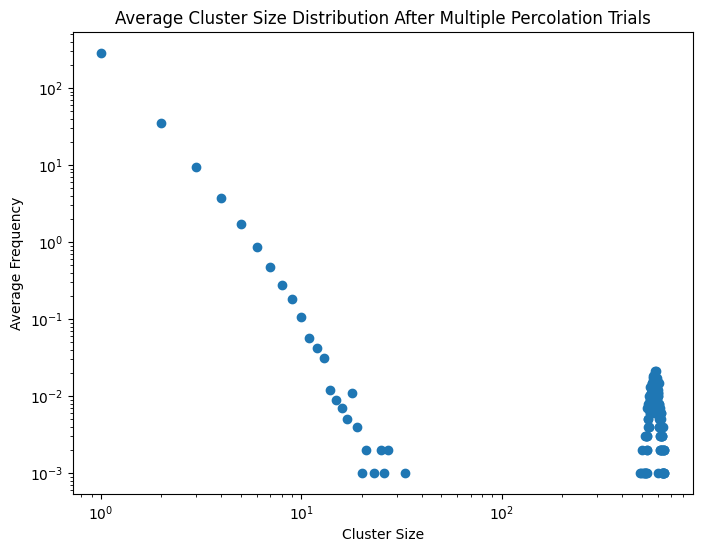

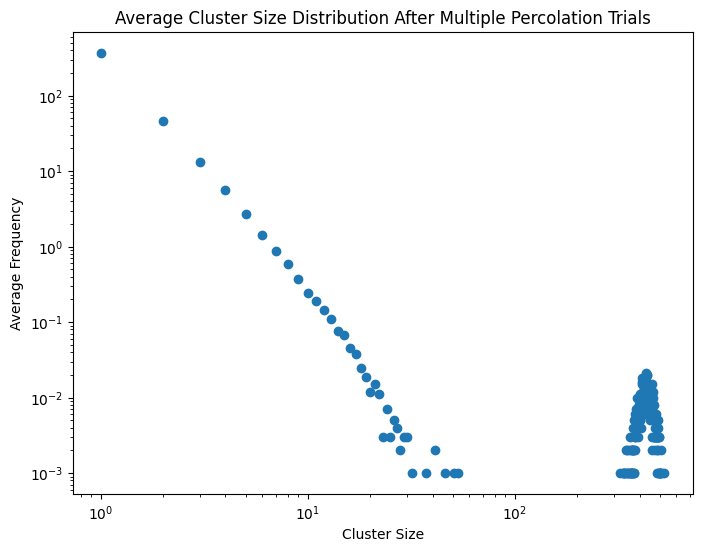

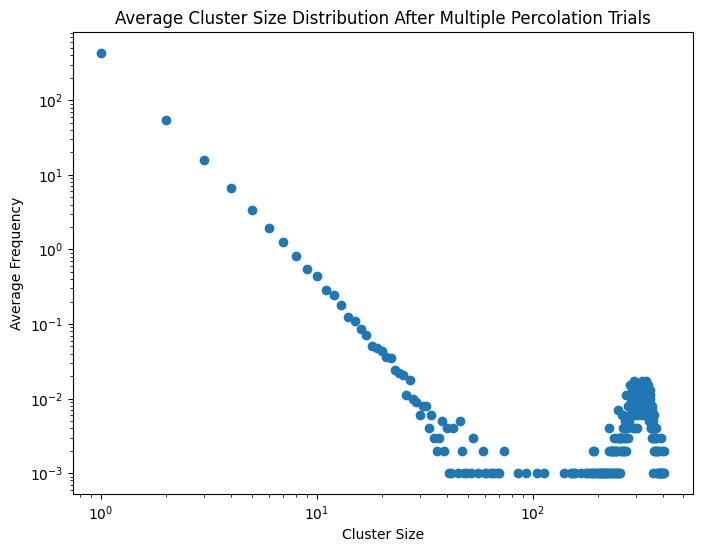

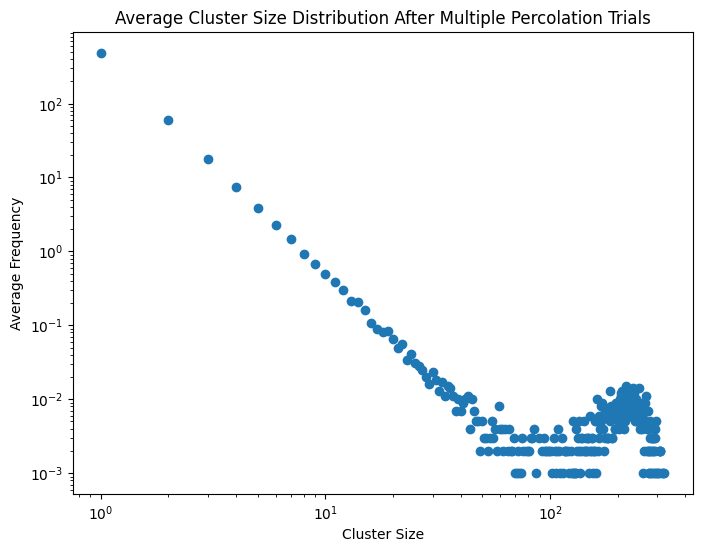

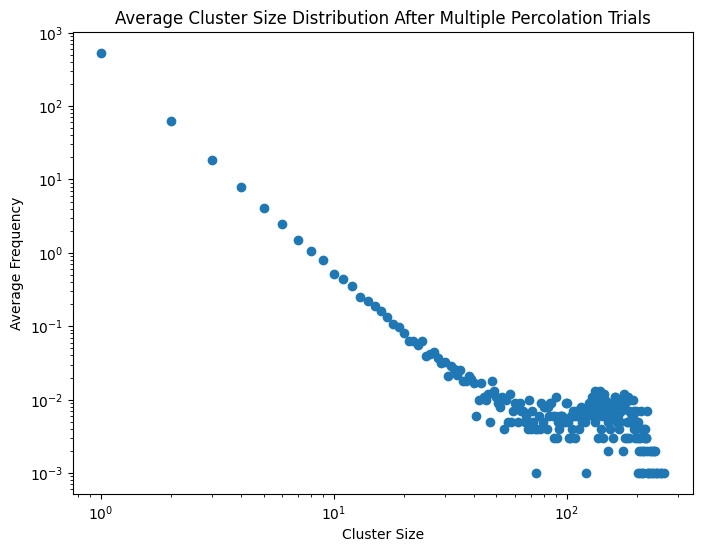

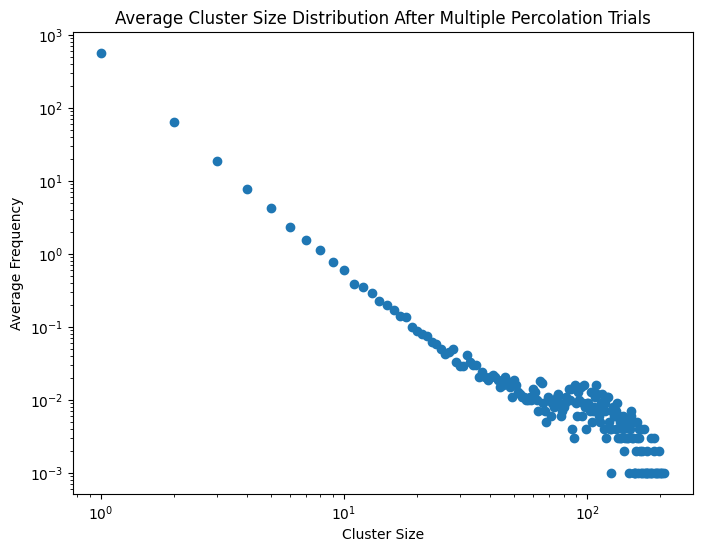

In [31]:
# Install necessary libraries (if not already installed)
# Uncomment the following lines if you need to install the packages
# !pip install networkx numpy matplotlib

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the network
n = 1000      # Number of nodes
m = 3         # Number of edges to attach from a new node to existing nodes
p = 0.1      # Probability of adding a triangle after adding a random edge

# Generate the clustered power-law network
G = nx.powerlaw_cluster_graph(n, m, p)

# Function to perform bond percolation
def bond_percolation(graph, retain_prob):
    """Perform bond percolation on a graph."""
    percolated_graph = nx.Graph()
    percolated_graph.add_nodes_from(graph.nodes())
    for edge in graph.edges():
        if np.random.rand() < retain_prob:
            percolated_graph.add_edge(*edge)
    return percolated_graph

# Set the edge retention probability
edge_retention_prob = 0.1

# Function for multiple percolation trials
def multiple_percolation_trials(graph, retain_prob, trials):
    aggregated_cluster_sizes = []
    for _ in range(trials):
        G_perc = bond_percolation(graph, retain_prob)
        components = nx.connected_components(G_perc)
        cluster_sizes = [len(component) for component in components]
        aggregated_cluster_sizes.extend(cluster_sizes)
    return aggregated_cluster_sizes

# Number of trials
trials = 1000


for i in range(1,10):
    # Set the edge retention probability
    edge_retention_prob = 1/i
    # Perform multiple trials
    all_cluster_sizes = multiple_percolation_trials(G, edge_retention_prob, trials)
    # Compute averaged distribution
    from collections import Counter
    cluster_size_distribution = Counter(all_cluster_sizes)
    sizes = list(cluster_size_distribution.keys())
    counts = [cluster_size_distribution[size] / trials for size in sizes]

    # Plot the averaged cluster size distribution
    plt.figure(figsize=(8,6))
    plt.loglog(sizes, counts, marker='o', linestyle='None')
    plt.title('Average Cluster Size Distribution After Multiple Percolation Trials')
    plt.xlabel('Cluster Size')
    plt.ylabel('Average Frequency')
plt.show()



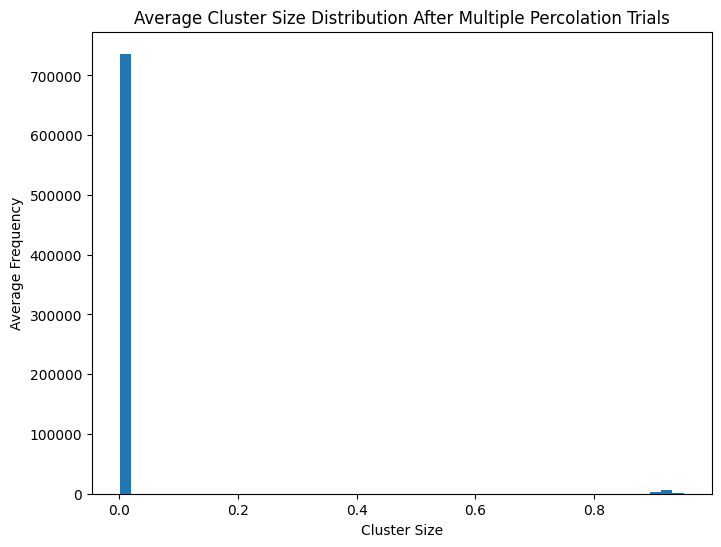

In [24]:
# Plot the averaged cluster size distribution
plt.figure(figsize=(8,6))
plt.hist([i/n for i in all_cluster_sizes], bins = 50)
plt.title('Average Cluster Size Distribution After Multiple Percolation Trials')
plt.xlabel('Cluster Size')
plt.ylabel('Average Frequency')
plt.show()

Running simulations for s = 200, p_m = 0.01
Running simulations for s = 200, p_m = 0.01
Running simulations for s = 200, p_m = 0.02
Running simulations for s = 200, p_m = 0.02
Running simulations for s = 200, p_m = 0.03
Running simulations for s = 200, p_m = 0.03
Running simulations for s = 200, p_m = 0.04
Running simulations for s = 200, p_m = 0.04
Running simulations for s = 200, p_m = 0.05
Running simulations for s = 200, p_m = 0.05
Running simulations for s = 200, p_m = 0.06
Running simulations for s = 200, p_m = 0.06
Running simulations for s = 200, p_m = 0.07
Running simulations for s = 200, p_m = 0.07
Running simulations for s = 200, p_m = 0.08
Running simulations for s = 200, p_m = 0.08
Running simulations for s = 200, p_m = 0.09
Running simulations for s = 200, p_m = 0.09
Running simulations for s = 200, p_m = 0.10
Running simulations for s = 200, p_m = 0.10
Running simulations for s = 200, p_m = 0.11
Running simulations for s = 200, p_m = 0.11
Running simulations for s = 200,

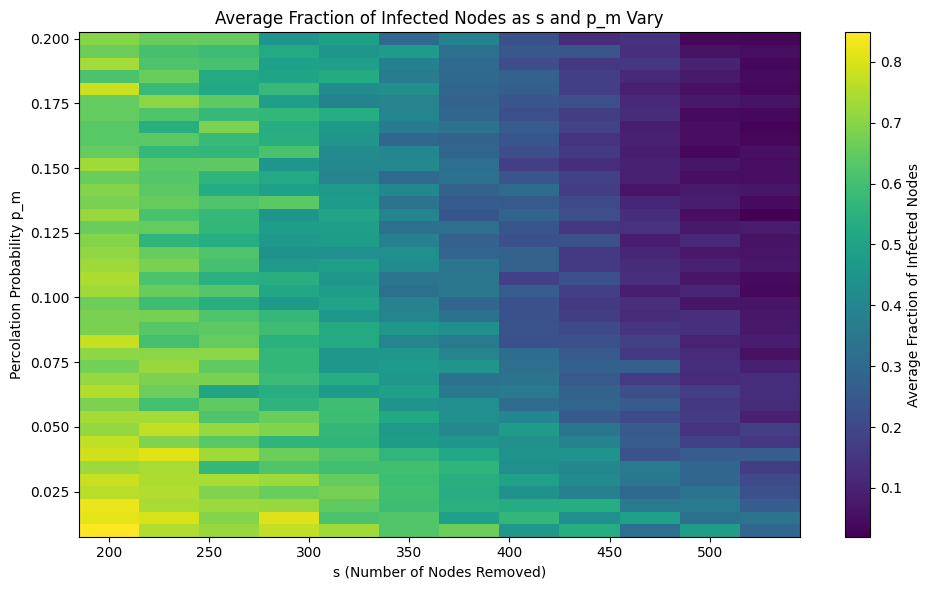

In [9]:
import networkx as nx
import random
from collections import deque
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Perform percolation to remove s nodes from the network
def percolate_graph(G, p_m, s):
    """
    Performs percolation on graph G with transmission probability p_m,
    starting from random nodes, and continues until s nodes have been removed.
    Returns the set of nodes to be removed.
    """
    if s <= 0 or G.number_of_nodes() == 0:
        return set()
    
    percolated_nodes = set()
    remaining_nodes = set(G.nodes())
    
    while len(percolated_nodes) < s and remaining_nodes:
        initial_node = random.choice(list(remaining_nodes))
        queue = deque([initial_node])
        percolated_nodes.add(initial_node)
        remaining_nodes.remove(initial_node)
        
        while queue and len(percolated_nodes) < s:
            current_node = queue.popleft()
            for neighbor in G.neighbors(current_node):
                if neighbor not in percolated_nodes and random.random() < p_m:
                    percolated_nodes.add(neighbor)
                    remaining_nodes.discard(neighbor)
                    queue.append(neighbor)
                    if len(percolated_nodes) >= s:
                        break  # Stop if we've reached s nodes
        # If the current percolation process didn't reach s nodes, start from a new node
    return percolated_nodes

# Step 4: Simulate the epidemic on the susceptible subgraph
def simulate_epidemic(G, p_i):
    """
    Simulates an epidemic on graph G with infection probability p_i.
    Returns the set of infected nodes.
    """
    if G.number_of_nodes() == 0:
        return set()
    
    susceptible = set(G.nodes())
    infected = set()
    initial_node = random.choice(list(G.nodes()))
    infected.add(initial_node)
    susceptible.remove(initial_node)
    queue = deque([initial_node])

    while queue:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor in susceptible and random.random() < p_i:
                susceptible.remove(neighbor)
                infected.add(neighbor)
                queue.append(neighbor)
    return infected

def average_infected_epi(n, m, p, p_m, p_i, s, N):
    """
    Runs N simulations of the epidemic for given s and p_i,
    and returns the average fraction of infected individuals.
    """
    total_fraction_infected = 0
    for _ in range(N):
        # Generate a clustered network using the powerlaw_cluster_graph function
        G = nx.powerlaw_cluster_graph(n, m, p)
        # Run percolation to get nodes to be removed
        percolated_nodes = percolate_graph(G, p_m, s)
        # Remove percolated nodes from G to get the susceptible subgraph
        susceptible_nodes = set(G.nodes()) - percolated_nodes
        G_susceptible = G.subgraph(susceptible_nodes).copy()
        if G_susceptible.number_of_nodes() > 0:
            infected_nodes = simulate_epidemic(G_susceptible, p_i)
            fraction_infected = len(infected_nodes) / (n-s)
            total_fraction_infected += fraction_infected
        else:
            total_fraction_infected += 0
    average_fraction_infected = total_fraction_infected / N
    return average_fraction_infected

# Parameters
n = 1000      # Number of nodes in the network
m = 4         # Each new node attaches to m existing nodes
p = 0.9       # Probability of creating a triangle after adding a random edge
p_i = 0.5     # Probability for meta-infection (percolation)
N = 50        # Number of simulations per parameter combination

# Lists of s and p_m values
s_list = range(200, 551, 30)  # s values from 50 to 550 in steps of 50
p_m_list = np.linspace(0.01, 0.2, 40)  # p_i values from 0.1 to 0.9

# Initialize the matrix to store average infected fractions
average_infected = np.zeros((len(p_m_list), len(s_list)))

# Run simulations and collect data
for i, s in enumerate(s_list):
    for j, p_m in enumerate(p_m_list):
        print(f"Running simulations for s = {s}, p_m = {p_m:.2f}")
        avg_inf = average_infected_epi(n, m, p, p_m, p_i, s, N)
        average_infected[j, i] = avg_inf

# Plotting the heatmap using matplotlib
plt.figure(figsize=(10, 6))
X, Y = np.meshgrid(s_list, p_m_list)
plt.pcolormesh(X, Y, average_infected, shading='auto', cmap='viridis')

plt.colorbar(label='Average Fraction of Infected Nodes')
plt.xlabel('s (Number of Nodes Removed)')
plt.ylabel('Percolation Probability p_m')
plt.title('Average Fraction of Infected Nodes as s and p_m Vary')
plt.tight_layout()
plt.show()


In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from scipy.interpolate import interp1d

def generate_clustered_network(N, M):
    """
    Generates a random clustered network with cliques of size M and removes isolated cliques and nodes.
    
    Parameters:
        N (int): Total number of nodes in the network.
        M (int): Size of the cliques to be formed (M >= 3).
    
    Returns:
        adj_matrix (numpy.ndarray): Adjacency matrix of the generated network.
    """
    # Set random seed for reproducibility
    np.random.seed(42)
    random.seed(42)
    
    # Parameters for the Poisson distributions
    lambda_edges = 2.5      # Average number of single edges per node
    lambda_cliques = 2.0    # Average number of cliques per node
    
    # Generate degrees for edges and cliques
    # For simplicity, we assume independence between edges and cliques
    edge_degrees = np.random.poisson(lambda_edges, N)
    clique_degrees = np.random.poisson(lambda_cliques, N)
    
    # Adjust degrees to ensure total stubs are compatible
    # For edges
    if sum(edge_degrees) % 2 != 0:
        idx = np.random.randint(0, N)
        edge_degrees[idx] += 1
    
    # For cliques
    remainder = sum(clique_degrees) % M
    if remainder != 0:
        for _ in range(M - remainder):
            idx = np.random.randint(0, N)
            clique_degrees[idx] += 1
    
    # Create edge stubs and clique stubs
    edge_stubs = []
    for node, degree in enumerate(edge_degrees):
        edge_stubs.extend([node] * degree)
    
    clique_stubs = []
    for node, degree in enumerate(clique_degrees):
        clique_stubs.extend([node] * degree)
    
    # Shuffle stubs
    np.random.shuffle(edge_stubs)
    np.random.shuffle(clique_stubs)
    
    # Construct edges by pairing edge stubs
    edges = []
    for i in range(0, len(edge_stubs), 2):
        if i+1 < len(edge_stubs):
            n1 = edge_stubs[i]
            n2 = edge_stubs[i+1]
            if n1 != n2:
                edges.append((n1, n2))
    
    # Construct cliques by grouping clique stubs into groups of size M
    cliques = []
    for i in range(0, len(clique_stubs), M):
        if i + M - 1 < len(clique_stubs):
            nodes = clique_stubs[i:i+M]
            unique_nodes = set(nodes)
            if len(unique_nodes) == M:
                cliques.append(nodes)
    
    # Combine edges and cliques into adjacency list
    adjacency = {i: set() for i in range(N)}
    
    # Add edges to adjacency list
    for n1, n2 in edges:
        adjacency[n1].add(n2)
        adjacency[n2].add(n1)
    
    # Add cliques to adjacency list
    for clique_nodes in cliques:
        for n1 in clique_nodes:
            others = set(clique_nodes) - {n1}
            adjacency[n1].update(others)
    
    # Remove isolated cliques (loops)
    # Identify connected components
    def dfs(node, visited, component):
        visited.add(node)
        component.add(node)
        for neighbor in adjacency[node]:
            if neighbor not in visited:
                dfs(neighbor, visited, component)
    
    visited = set()
    components = []
    for node in adjacency:
        if node not in visited and adjacency[node]:
            component = set()
            dfs(node, visited, component)
            components.append(component)
    
    # Remove components that are isolated cliques
    nodes_to_remove = set()
    for component in components:
        # Check if the component forms a clique
        is_clique = True
        size = len(component)
        for node in component:
            neighbors = adjacency[node]
            if len(neighbors) != size - 1:
                is_clique = False
                break
        if is_clique:
            nodes_to_remove.update(component)
    
    # Remove nodes of isolated cliques from adjacency
    for node in nodes_to_remove:
        del adjacency[node]
    
    # Also remove references to these nodes from other nodes' adjacency lists
    for node in adjacency:
        adjacency[node] -= nodes_to_remove
    
    # Remove isolated nodes (nodes with no neighbors)
    isolated_nodes = [node for node, neighbors in adjacency.items() if not neighbors]
    for node in isolated_nodes:
        del adjacency[node]
    
    # Reindex nodes to have consecutive indices starting from 0
    remaining_nodes = sorted(adjacency.keys())
    node_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(remaining_nodes)}
    num_nodes = len(remaining_nodes)
    
    # Create adjacency matrix
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for old_node, neighbors in adjacency.items():
        new_node = node_mapping[old_node]
        for neighbor in neighbors:
            adj_matrix[new_node, node_mapping[neighbor]] = 1
            # For undirected graph, ensure symmetry
            adj_matrix[node_mapping[neighbor], new_node] = 1
    
    return adj_matrix


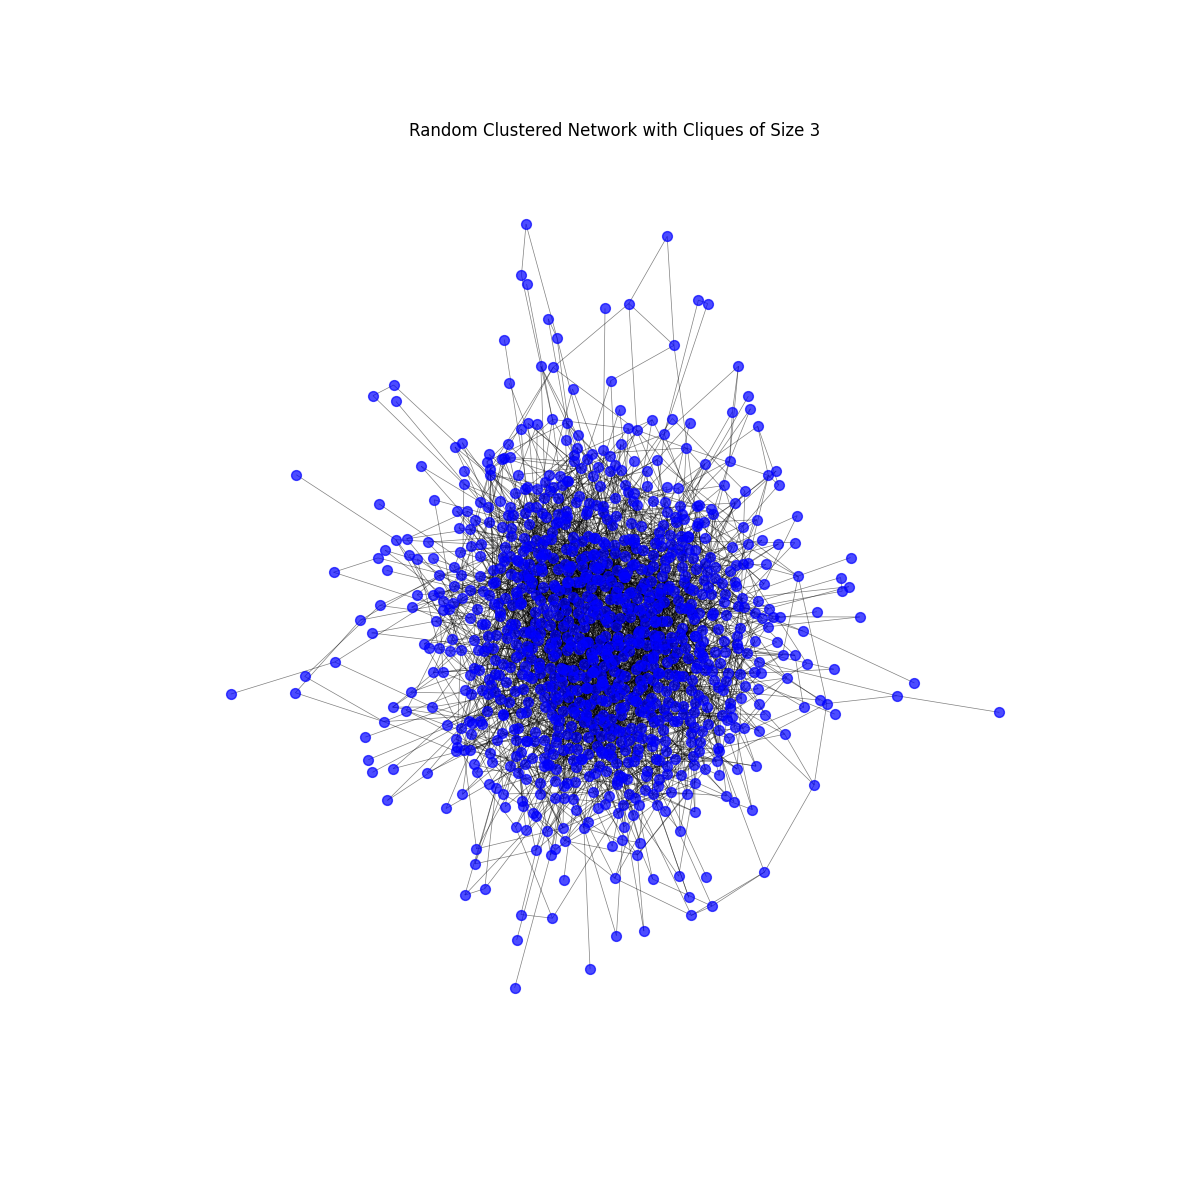

In [12]:
N = 1000   # Number of nodes in the network
M = 3     # Size of the cliques

# Generate the adjacency matrix
adj_matrix = generate_clustered_network(N, M)

# Create a NetworkX graph for visualization
G = nx.from_numpy_array(adj_matrix)

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, iterations=100)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

plt.axis('off')
plt.title(f'Random Clustered Network with Cliques of Size {M}')
plt.show()

In [14]:
def perform_bond_percolation(adj_matrix, N_p, p_values):
    """
    Performs bond percolation on a network defined by adj_matrix over a range of edge retention probabilities.
    
    Parameters:
        adj_matrix (numpy.ndarray): Adjacency matrix of the network.
        N_p (int): Number of percolation trials per edge retention probability.
        p_values (numpy.ndarray): Array of edge retention probabilities (between 0 and 1).
    
    Returns:
        percolation_results (dict): Dictionary containing percolation analysis results.
    """
    num_nodes = adj_matrix.shape[0]
    percolation_results = {
        'p_values': p_values,
        'giant_component_sizes': [],
        'cluster_size_distributions': [],
    }
    
    for p in tqdm(p_values, desc='Percolation Progress'):
        largest_components = []
        cluster_sizes = []
        
        for _ in range(N_p):
            # Perform bond percolation by retaining edges with probability p
            percolated_adj = adj_matrix.copy()
            # Get indices of the upper triangle (since adj_matrix is symmetric)
            upper_tri_indices = np.triu_indices(num_nodes, k=1)
            edges = np.vstack(upper_tri_indices).T
            existing_edges = edges[percolated_adj[upper_tri_indices] > 0]
            
            # Randomly remove edges
            retain_mask = np.random.rand(len(existing_edges)) < p
            retained_edges = existing_edges[retain_mask]
            
            # Create a new adjacency matrix for the percolated graph
            percolated_adj = np.zeros_like(adj_matrix)
            percolated_adj[retained_edges[:, 0], retained_edges[:, 1]] = 1
            percolated_adj[retained_edges[:, 1], retained_edges[:, 0]] = 1  # Symmetric
            
            # Create a NetworkX graph from the percolated adjacency matrix
            G_perc = nx.from_numpy_array(percolated_adj)
            
            # Get connected components
            connected_components = [len(cc) for cc in nx.connected_components(G_perc)]
            
            if connected_components:
                # Largest connected component size
                largest_components.append(max(connected_components) / num_nodes)
                # Record all cluster sizes
                cluster_sizes.extend(connected_components)
            else:
                largest_components.append(0)
        
        # Average size of the largest connected component for this p
        avg_largest_component = np.mean(largest_components)
        percolation_results['giant_component_sizes'].append(avg_largest_component)
        percolation_results['cluster_size_distributions'].append(cluster_sizes)
    
    # Convert lists to numpy arrays
    percolation_results['giant_component_sizes'] = np.array(percolation_results['giant_component_sizes'])
    
    # Estimate the percolation threshold
    percolation_threshold = estimate_percolation_threshold(
        percolation_results['p_values'],
        percolation_results['giant_component_sizes']
    )
    percolation_results['percolation_threshold'] = percolation_threshold
    
    return percolation_results

def estimate_percolation_threshold(p_values, giant_component_sizes):
    """
    Estimates the percolation threshold as the point where the size of the giant component
    increases rapidly (inflection point).
    
    Parameters:
        p_values (numpy.ndarray): Array of edge retention probabilities.
        giant_component_sizes (numpy.ndarray): Corresponding sizes of the largest connected component.
    
    Returns:
        p_c (float): Estimated percolation threshold.
    """
    # Smooth the giant component sizes
    f = interp1d(p_values, giant_component_sizes, kind='cubic')
    p_smooth = np.linspace(p_values[0], p_values[-1], 500)
    gc_smooth = f(p_smooth)
    
    # Compute the derivative of the giant component sizes
    derivative = np.gradient(gc_smooth, p_smooth)
    
    # Find the p value where the derivative is maximized
    max_derivative_index = np.argmax(derivative)
    p_c = p_smooth[max_derivative_index]
    
    return p_c

Percolation Progress: 100%|██████████| 101/101 [01:03<00:00,  1.59it/s]


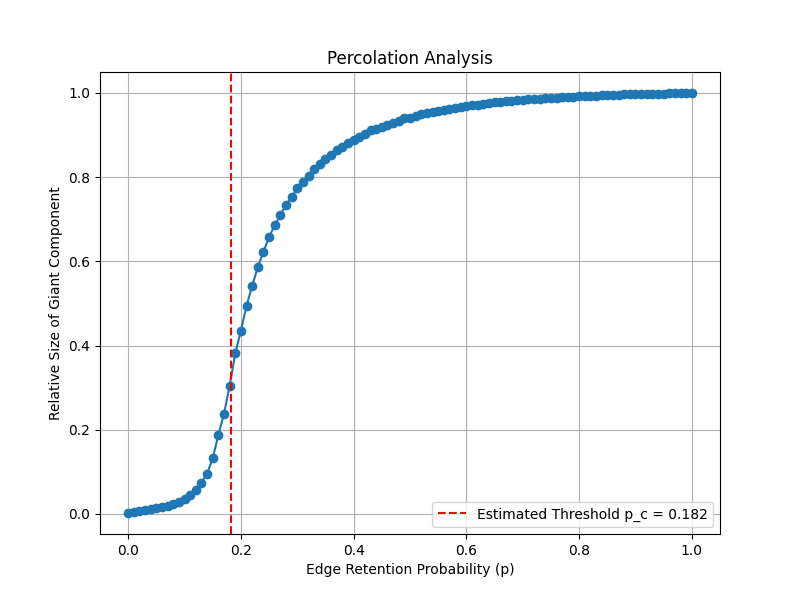

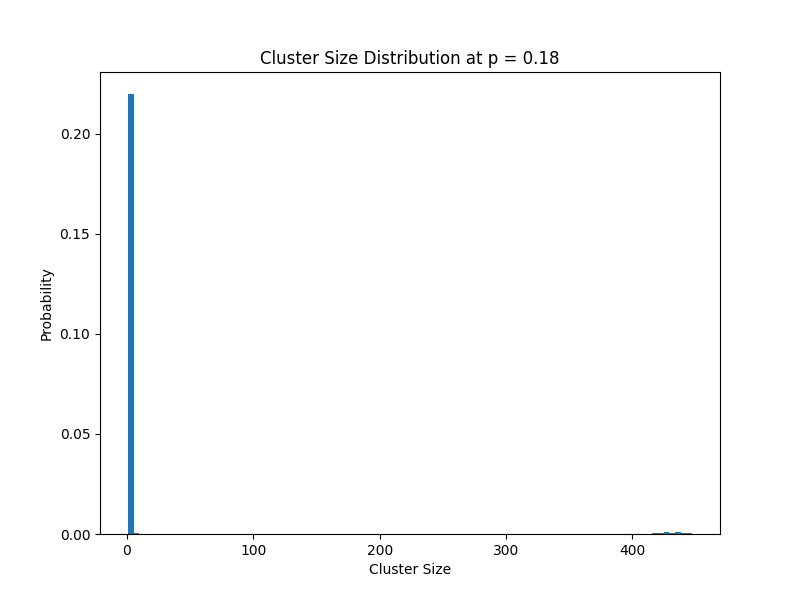

In [31]:
# Assume adj_matrix is obtained from the previous function generate_clustered_network
N = 500
M = 3
adj_matrix = generate_clustered_network(N, M)

# Define percolation parameters
N_p = 200  # Number of trials per p
p_values = np.linspace(0.0, 1.0, 101)  # Edge retention probabilities from 0 to 1

# Perform bond percolation
percolation_results = perform_bond_percolation(adj_matrix, N_p, p_values)

# Plot the size of the giant component vs. p
plt.figure(figsize=(8, 6))
plt.plot(percolation_results['p_values'], percolation_results['giant_component_sizes'], marker='o')
plt.axvline(percolation_results['percolation_threshold'], color='r', linestyle='--', label=f'Estimated Threshold p_c = {percolation_results["percolation_threshold"]:.3f}')
plt.title('Percolation Analysis')
plt.xlabel('Edge Retention Probability (p)')
plt.ylabel('Relative Size of Giant Component')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, plot the cluster size distribution at the percolation threshold
p_c_index = np.argmin(np.abs(percolation_results['p_values'] - percolation_results['percolation_threshold']))
cluster_sizes_at_pc = percolation_results['cluster_size_distributions'][p_c_index+20]

plt.figure(figsize=(8, 6))
plt.hist(cluster_sizes_at_pc, bins = 100, density=True)
plt.title(f'Cluster Size Distribution at p = {percolation_results["p_values"][p_c_index]:.2f}')
plt.xlabel('Cluster Size')
plt.ylabel('Probability')
plt.show()


Percolation Progress: 100%|██████████| 101/101 [01:21<00:00,  1.24it/s]


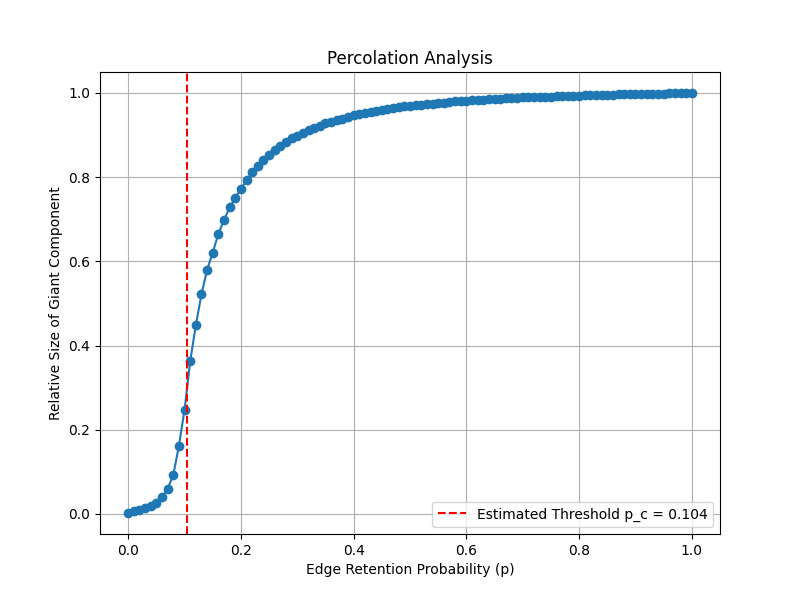

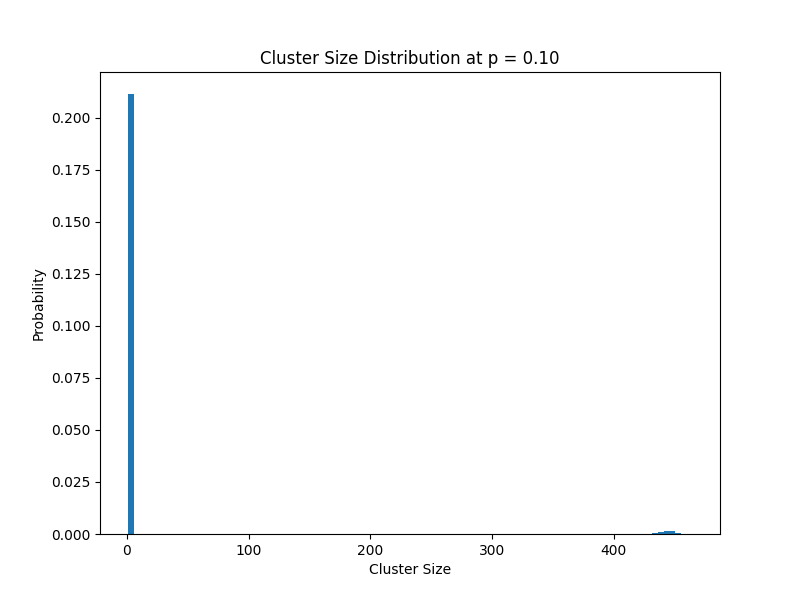

In [32]:
# Assume adj_matrix is obtained from the previous function generate_clustered_network
N = 500
M = 5
adj_matrix = generate_clustered_network(N, M)

# Define percolation parameters
N_p = 200  # Number of trials per p
p_values = np.linspace(0.0, 1.0, 101)  # Edge retention probabilities from 0 to 1

# Perform bond percolation
percolation_results = perform_bond_percolation(adj_matrix, N_p, p_values)

# Plot the size of the giant component vs. p
plt.figure(figsize=(8, 6))
plt.plot(percolation_results['p_values'], percolation_results['giant_component_sizes'], marker='o')
plt.axvline(percolation_results['percolation_threshold'], color='r', linestyle='--', label=f'Estimated Threshold p_c = {percolation_results["percolation_threshold"]:.3f}')
plt.title('Percolation Analysis')
plt.xlabel('Edge Retention Probability (p)')
plt.ylabel('Relative Size of Giant Component')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, plot the cluster size distribution at the percolation threshold
p_c_index = np.argmin(np.abs(percolation_results['p_values'] - percolation_results['percolation_threshold']))
cluster_sizes_at_pc = percolation_results['cluster_size_distributions'][p_c_index+20]

plt.figure(figsize=(8, 6))
plt.hist(cluster_sizes_at_pc, bins = 100, density=True)
plt.title(f'Cluster Size Distribution at p = {percolation_results["p_values"][p_c_index]:.2f}')
plt.xlabel('Cluster Size')
plt.ylabel('Probability')
plt.show()

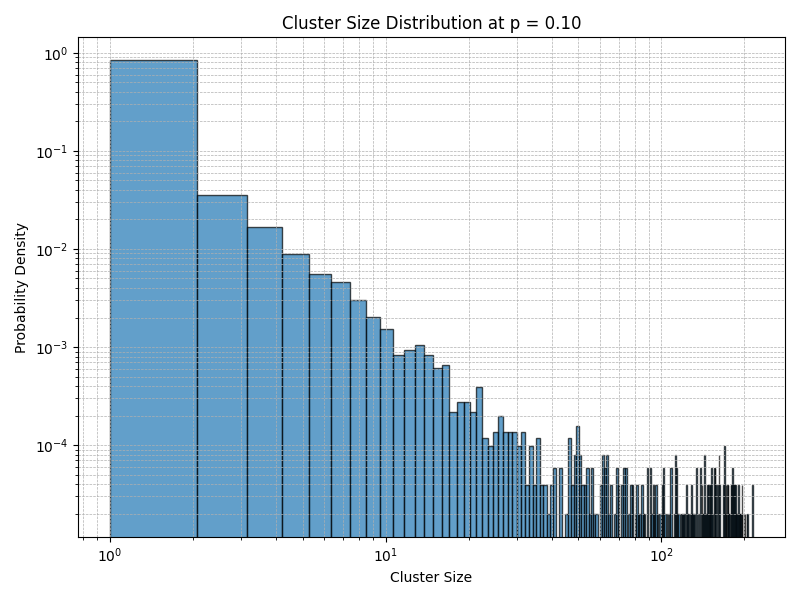

In [35]:
# Get the cluster sizes at the percolation threshold
p_c_index = np.argmin(np.abs(percolation_results['p_values'] - percolation_results['percolation_threshold']))
cluster_sizes_at_pc = percolation_results['cluster_size_distributions'][p_c_index]

# Remove clusters of size zero (if any)
cluster_sizes = [size for size in cluster_sizes_at_pc if size > 0]

# Create logarithmically spaced bins for the histogram
min_cluster_size = min(cluster_sizes)
max_cluster_size = max(cluster_sizes)
#bins = np.logspace(np.log10(min_cluster_size), np.log10(max_cluster_size), num=50)

# Plot the histogram on a log-log scale
plt.figure(figsize=(8, 6))
plt.hist(cluster_sizes, bins=200, density=True, log=True, edgecolor='black', alpha=0.7)

# Set the scales to logarithmic
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Cluster Size')
plt.ylabel('Probability Density')
plt.title(f'Cluster Size Distribution at p = {percolation_results["p_values"][p_c_index]:.2f}')

# Grid and layout adjustments
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


# What to ask now
- Can we produce the same analytical results as in Miller and Newman papers?
- How do we conduct the vaccination scheme (so how does clustering change outbreak prop - what fraction are in large cluster sizes/outbraks)?
    - This could involve picking uniformly to clusters in some way, and vaccinating/not vaccinating whole cliques, effectivly removing them from the graph